# Step 2: Data Storing

In [1]:
# import DataStoring as ds
# ds.init()

# Step 3: Visualization

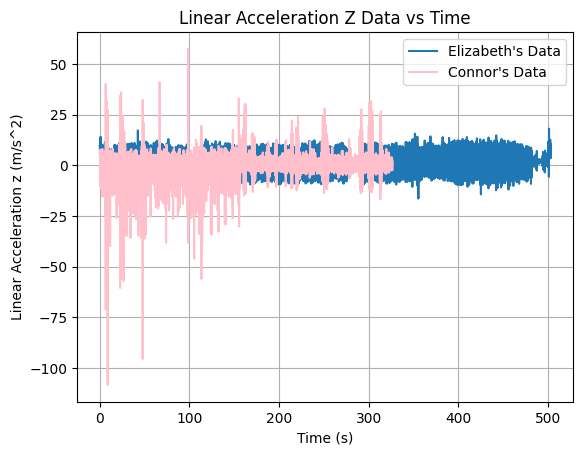

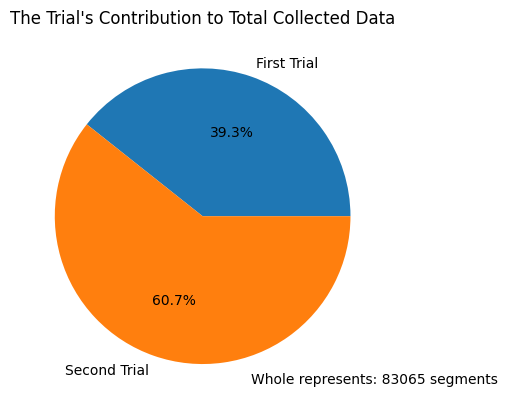

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dfFirst = pd.read_csv(r"ConnorData.csv")
dfSecond = pd.read_csv(r"ElizabethData.csv")

xFirstAxis = dfFirst["Time (s)"]
xSecondAxis = dfSecond["Time (s)"]

plt.plot(xSecondAxis, dfSecond["Acceleration z (m/s^2)"], label = "Elizabeth's Data")
plt.plot(xFirstAxis, dfFirst['Linear Acceleration z (m/s^2)'], label = "Connor's Data", color = "pink")
plt.xlabel("Time (s)")
plt.ylabel("Linear Acceleration z (m/s^2)")
plt.legend(loc = "upper right")
plt.title("Linear Acceleration Z Data vs Time")
plt.grid(True)
plt.show()

sizes = [len(dfFirst), len(dfSecond)]
total = sum(sizes)
labels = ['First Trial', 'Second Trial']
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.title("The Trial's Contribution to Total Collected Data")
plt.text(2, -1.15, f'Whole represents: {total} segments', ha='right', va = 'bottom' )
plt.show()


# Step 4: Pre-Processing

In [2]:
import DataStoring as ds
from sklearn.preprocessing import StandardScaler

windowSize = 5
filteredDataset = ds.dataframe.rolling(window=windowSize).mean()

scaler = StandardScaler()

dfNormalized = scaler.fit_transform(ds.dataframe)


            0
0   -2.762805
1   -2.602338
2   -3.574417
3   -4.856800
4   -6.868018
..        ...
495 -4.410268
496 -3.690757
497 -2.858424
498 -0.101759
499  1.242235

[83063 rows x 1 columns]


# Step 5: Feature Extraction and Normailzation

In [4]:
# extract min 10 diff features
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py

# Open the HDF5 file
with h5py.File('finalDataset.h5', 'r') as file:
    # Assume 'dataset_name' is the name of your dataset of interest
    data = file[''][:]



features = pd.DataFrame(columns=['max', 'min', 'mean', 'median', 'range', 'variance', 'std', 'z-score', 'kurtosis', 'skewness'])
features['mean'] = ds.dataframe.rolling(window=windowSize).mean()
features['std'] = ds.dataframe.rolling(window=windowSize).std()
features['max'] = ds.dataframe.rolling(window=windowSize).max()
features['min'] = ds.dataframe.rolling(window=windowSize).min()
features['median'] = ds.dataframe.rolling(window=windowSize).median()
features['range'] = features['max'] - features['min']
features['variance'] = ds.dataframe.rolling(window=windowSize).var()
features['z-score'] = (ds.dataframe - features['mean']) / features['std']
features['kurtosis'] = ds.dataframe.rolling(window=windowSize).kurt()
features['skewness'] = ds.dataframe.rolling(window=windowSize).skew()


: 

# Step 6: Classifier Creation

In [4]:
# take code from lab 6

# The numbering in your report
# should be 1.1, 1.2, 1.3, 1.4, and 1.5, followed by 2.1, 2.2, 2.3, and 2.4

# PART 1

# Step 1. Import the following libraries.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.decomposition import PCA

# Step 2. Read the dataset as a Pandas data frame.

dataset = pd.read_csv('winequalityN-lab6.csv')

# Step 3. The column that contains labels for this dataset is named 'quality'.
# high-quality = 1, low-quality = 0
# quality > 5 is high-quality, quality <= 5 is low-quality.

dataset['quality'] = dataset['quality'].apply(lambda x: 1 if x > 5 else 0)

# Step 3. Drop the first column of the dataset (wine type).

dataset = dataset.drop(columns=['type'])

# Step 4. Assign the last column of the data frame to a variable named 'labels' and the remaining columns to a variable named 'data'.

labels = dataset['quality']
data = dataset.drop(columns=['quality'])

# Step 5. Split the data into training and testing sets using the train_test_split function, 20% of data to test. Make sure you shuffle the data.

X_train, X_test, Y_Train, Y_Test = train_test_split(
    data, labels, test_size=0.2, random_state=42, shuffle=True)

# Step 6. Now, train and test the model.

# Setup.
l_reg = LogisticRegression(max_iter=1000)
clf = make_pipeline(StandardScaler(), l_reg)

# Training.
clf.fit(X_train, Y_Train)

# Testing.
Y_Pred = clf.predict(X_test)
Y_clf_prob = clf.predict_proba(X_test)

# 6.2. Accuracy.
model_accuracy = accuracy_score(Y_Test, Y_Pred)
print(f"{model_accuracy=}")
model_recall = recall_score(Y_Test, Y_Pred)

# 6.3. Confusion Matrix.
cm = confusion_matrix(Y_Test, Y_Pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

# 6.4. F1 Score.
f1_score = 2 * (model_accuracy * model_recall) / \
    (model_accuracy + model_recall)
print(f"{f1_score=}")

# 6.5. ROC Curve and AUC.
fpr, tpr, thresholds = roc_curve(
    Y_Test, Y_clf_prob[:, 1], pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()
roc_auc = roc_auc_score(Y_Test, Y_clf_prob[:, 1])
print(f"{roc_auc=}")

# Part 2
# Step 1. Read the dataset as a Pandas data frame.

dataset = pd.read_csv('winequalityN-lab6.csv')

# Step 1. The column that contains labels for this dataset is named 'quality'.
# high-quality = 1, low-quality = 0
# quality > 5 is high-quality, quality <= 5 is low-quality.

dataset['quality'] = dataset['quality'].apply(lambda x: 1 if x > 5 else 0)

# Step 1. Drop the first column of the dataset (wine type).

dataset = dataset.drop(columns=['type'])

# Step 1. Assign the last column of the data frame to a variable named 'labels' and the remaining columns to a variable named 'data'.

labels = dataset['quality']
data = dataset.drop(columns=['quality'])

# Step 1. Split the data into training and testing sets using the train_test_split function, 20% of data to test. Make sure you shuffle the data.

X_train, X_test, Y_Train, Y_Test = train_test_split(
    data, labels, test_size=0.2, random_state=42, shuffle=True)

# Initliaizing classes
std_scaler = StandardScaler()
l_reg = LogisticRegression(max_iter=10000)
pca = PCA(n_components=2)

# Step 2. Pipeline creation
pca_pipe = make_pipeline(std_scaler, pca)

# Step 3. Apply pipline over x_train and x_test, x_test_pca
X_train_pca = pca_pipe.fit_transform(X_train)
X_test_pca =  pca_pipe.transform(X_test)

# Step 4. Logistic Regression Pipeline
clf = make_pipeline(std_scaler, l_reg)

# Step 5. Training clf
clf.fit(X_train_pca, Y_Train)

# Step 6. Obtaining predictions for X_test_pca
y_pred_pca = clf.predict(X_test_pca)

# Step 7. creating decision boundary
disp = DecisionBoundaryDisplay.from_estimator( 
   clf, X_train_pca, response_method="predict", 
    xlabel='X1', ylabel='X2', 
    alpha=0.5, 
)

# Step 8. Plotting and Accuracy
disp.ax_.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_Train)
plt.show()

acc = accuracy_score(Y_Test, y_pred_pca)
print("model accuracy = ", acc)